# Do Transformers Habituate? Investigating Repetition Suppression in Language Models

The notebook contains the code for all the experiments conducted to asses the research project.

## Import and Setup

In [1]:
from transformers import AutoModelForCausalLM, AutoTokenizer
import torch

from utils.MLP_activation_hook import MLPActivationRecorder
from utils.visualization import plot_habituation_analysis
from utils.get_statistics import get_statistics

/home/danielaush/Documents/do-transformers-habituate/env/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
# Preliminary configuration

model_name = "Qwen/Qwen3-4B" # Qwen3-4B-Base for pre-training stage model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
target_token = "dog"
basic_prompt = "The dog barks every night."

In [3]:
# Load model

print(f"Loading model: {model_name}")
model = AutoModelForCausalLM.from_pretrained(
    model_name,
    torch_dtype=torch.float16 if device.type == "cuda" else torch.float32,
    device_map="auto" if device.type == "cuda" else None
)

tokenizer = AutoTokenizer.from_pretrained(model_name)
if tokenizer.pad_token is None:
    tokenizer.pad_token = tokenizer.eos_token
    
model = model.to(device)
print(f"Using device: {device}")

print(model)

Loading model: Qwen/Qwen3-4B


Loading checkpoint shards: 100%|██████████| 3/3 [00:02<00:00,  1.12it/s]


Using device: cpu
Qwen3ForCausalLM(
  (model): Qwen3Model(
    (embed_tokens): Embedding(151936, 2560)
    (layers): ModuleList(
      (0-35): 36 x Qwen3DecoderLayer(
        (self_attn): Qwen3Attention(
          (q_proj): Linear(in_features=2560, out_features=4096, bias=False)
          (k_proj): Linear(in_features=2560, out_features=1024, bias=False)
          (v_proj): Linear(in_features=2560, out_features=1024, bias=False)
          (o_proj): Linear(in_features=4096, out_features=2560, bias=False)
          (q_norm): Qwen3RMSNorm((128,), eps=1e-06)
          (k_norm): Qwen3RMSNorm((128,), eps=1e-06)
        )
        (mlp): Qwen3MLP(
          (gate_proj): Linear(in_features=2560, out_features=9728, bias=False)
          (up_proj): Linear(in_features=2560, out_features=9728, bias=False)
          (down_proj): Linear(in_features=9728, out_features=2560, bias=False)
          (act_fn): SiLU()
        )
        (input_layernorm): Qwen3RMSNorm((2560,), eps=1e-06)
        (post_attenti

Recorder loaded successfully!
Number of layers: 36
Text: The dog barks every night.
Registering hooks for token positions: [1]
Registered 36 MLP hooks
Running inference on 7 tokens...
Captured activations for 36 position-layer combinations


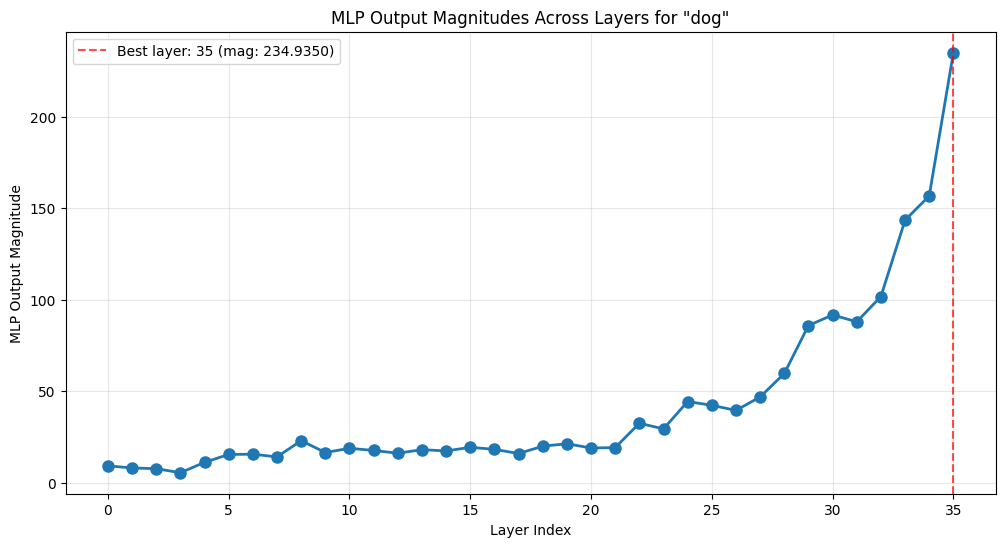

Best layer: 35 with magnitude: 234.9350


In [4]:
# Instantiate the recorder and find target MLP projection

recorder = MLPActivationRecorder(model=model, tokenizer=tokenizer, device=device)
best_layer, baseline_magnitude = recorder.find_best_layer_for_token(basic_prompt, target_token)

## Experiments

Text: The dog barks every night. The dog barks every night. The dog barks every night. The dog barks every night. The dog barks every night. The dog barks every night. The dog barks every night. The dog barks every night. The dog barks every night. The dog barks every night. The dog barks every night. The dog barks every night. The dog barks every night. The dog barks every night. The dog barks every night. The dog barks every night. The dog barks every night. The dog barks every night. The dog barks every night. The dog barks every night. 
Registering hooks for token positions: [1, 8, 15, 22, 29, 36, 43, 50, 57, 64, 71, 78, 85, 92, 99, 106, 113, 120, 127, 134]
Registered 36 MLP hooks
Running inference on 141 tokens...
Captured activations for 720 position-layer combinations
Target token: 'dog'
Layer analyzed: 30
Number of occurrences: 20
First magnitude: 91.6153
Last magnitude: 59.3145
Mean ± Std: 64.1586 ± 9.6695
Change: -35.26%

Linear Trend Analysis:
Slope: -1.154451 ± 0.286673
R²:

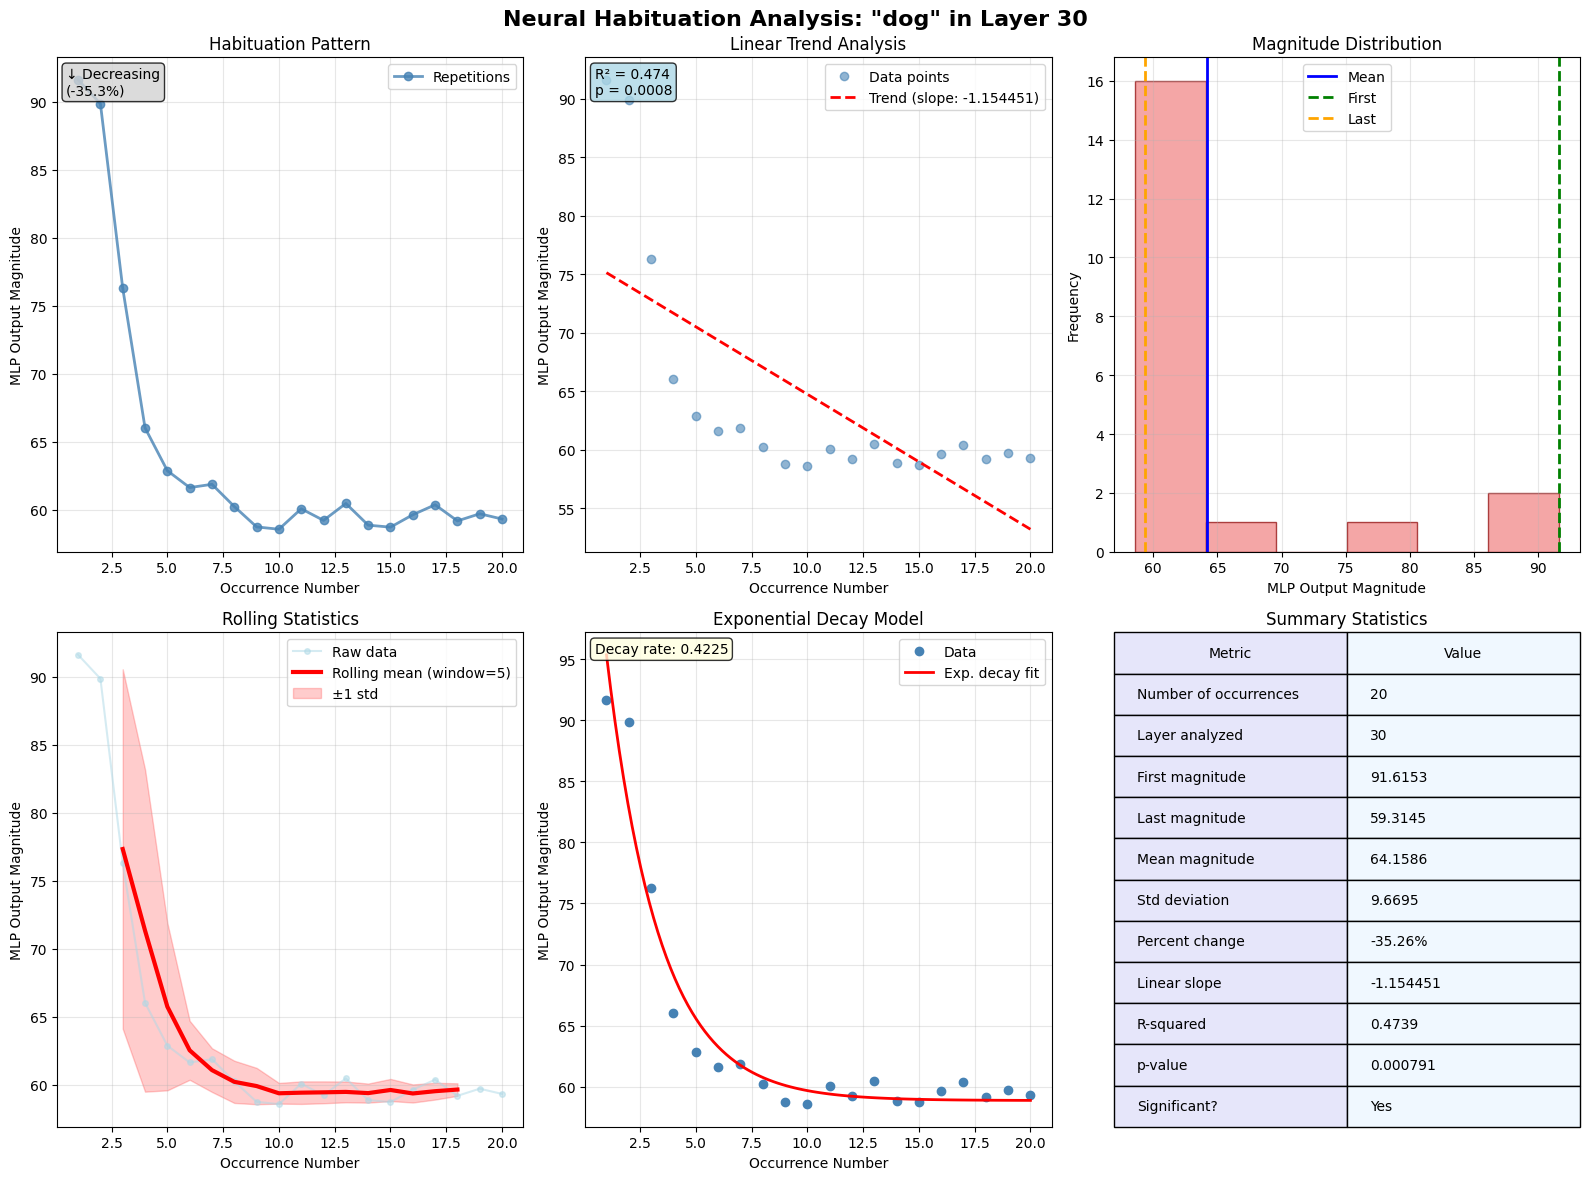

Text: The dog barks every night. The sun rises in the east. Water flows down the hill. The dog barks every night. Books contain written words. Trees have green leaves. The dog barks every night. Cars drive on roads. Birds fly in the sky. The dog barks every night. Houses have front doors. Clocks show the time. The dog barks every night. Flowers bloom in spring. Rain falls from clouds. The dog barks every night. Stars shine at night. Fish swim in water. The dog barks every night. Trains run on tracks. Wind moves the air. The dog barks every night. Bread is made from wheat. Ice melts when heated. The dog barks every night. Grass grows in fields. Lights illuminate darkness. The dog barks every night. Boats float on water. Snow falls in winter. The dog barks every night. Chairs provide seating space. Bridges span across rivers. The dog barks every night. Fire produces heat. Mountains reach great heights. The dog barks every night. Keys unlock doors. Mirrors reflect images. The dog barks ev

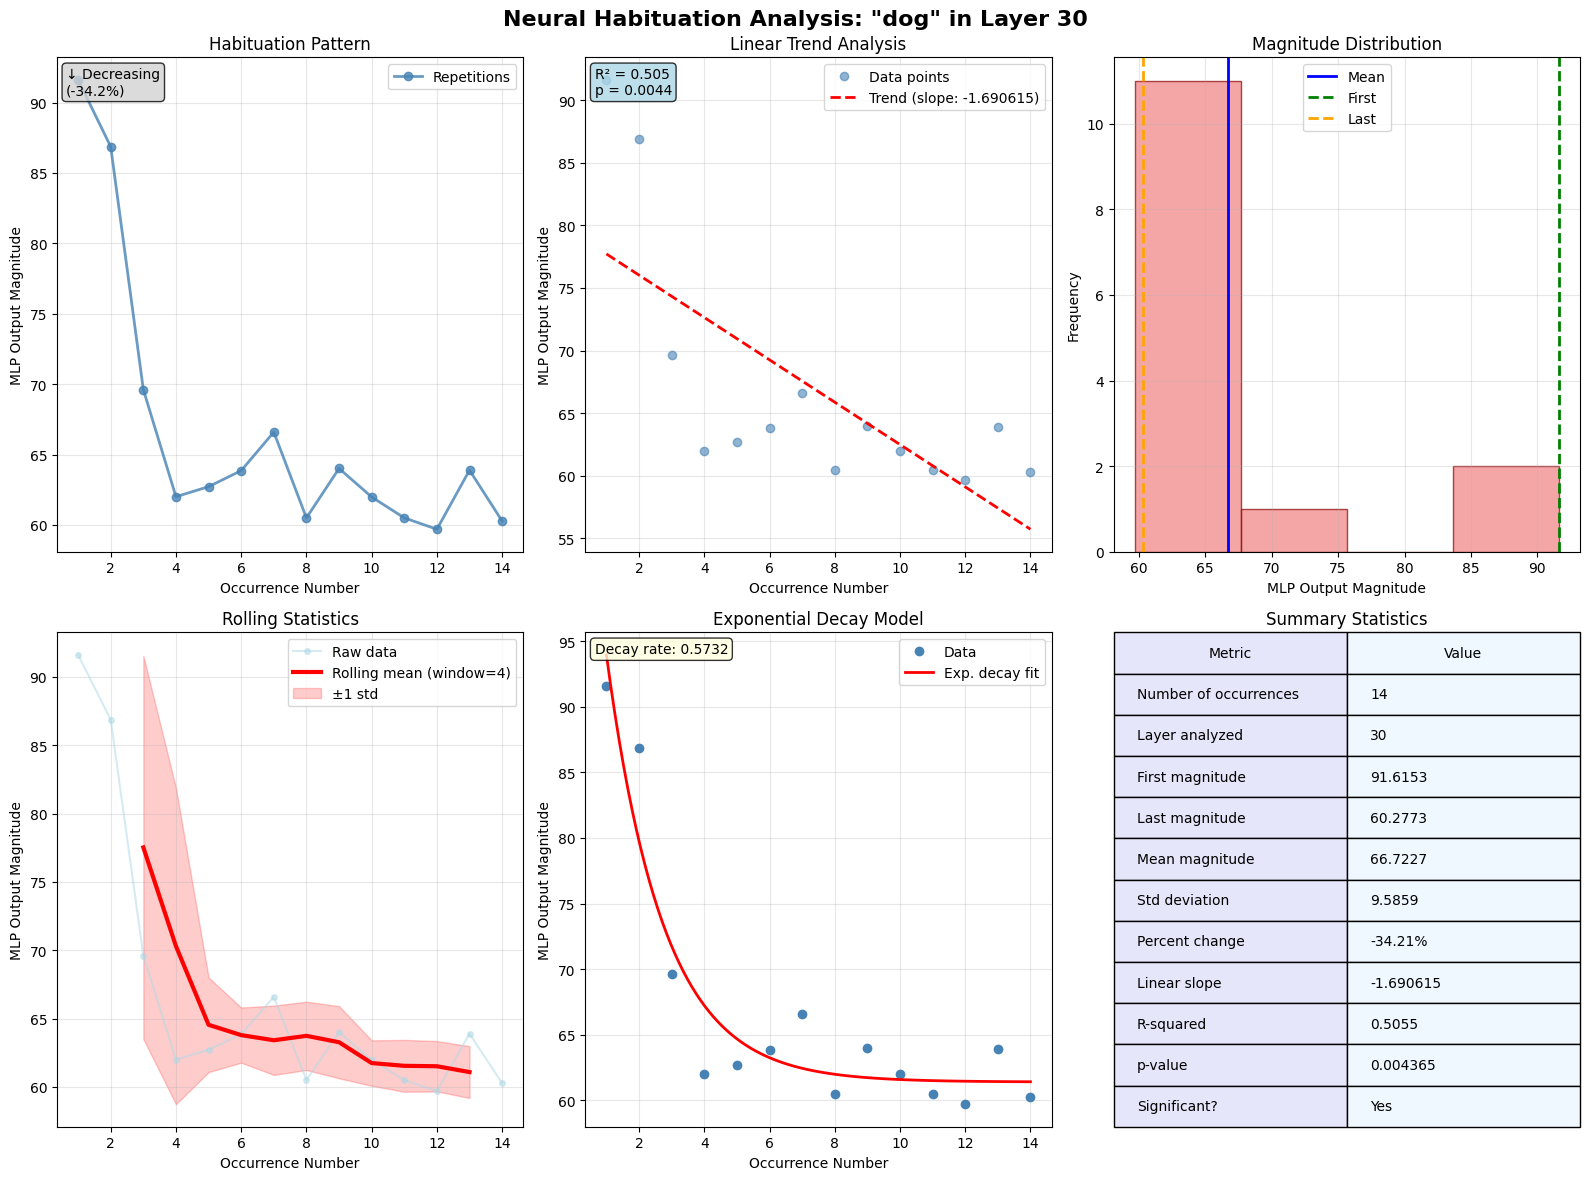

Text: The dog barks every night. The dog barks every night. The dog barks every night. Brief pause. The dog barks every night. The dog barks every night. The dog barks every night. Brief pause. The dog barks every night. The dog barks every night. The dog barks every night. Brief pause. The dog barks every night. The dog barks every night. The dog barks every night. Brief pause. The dog barks every night. The dog barks every night. The dog barks every night. Brief pause. The dog barks every night. The dog barks every night. The dog barks every night. Brief pause. The dog barks every night. The dog barks every night.
Registering hooks for token positions: [1, 8, 15, 25, 32, 39, 49, 56, 63, 73, 80, 87, 97, 104, 111, 121, 128, 135, 145, 152]
Registered 36 MLP hooks
Running inference on 158 tokens...
Captured activations for 720 position-layer combinations
Target token: 'dog'
Layer analyzed: 30
Number of occurrences: 20
First magnitude: 91.6153
Last magnitude: 59.2309
Mean ± Std: 64.7725 ±

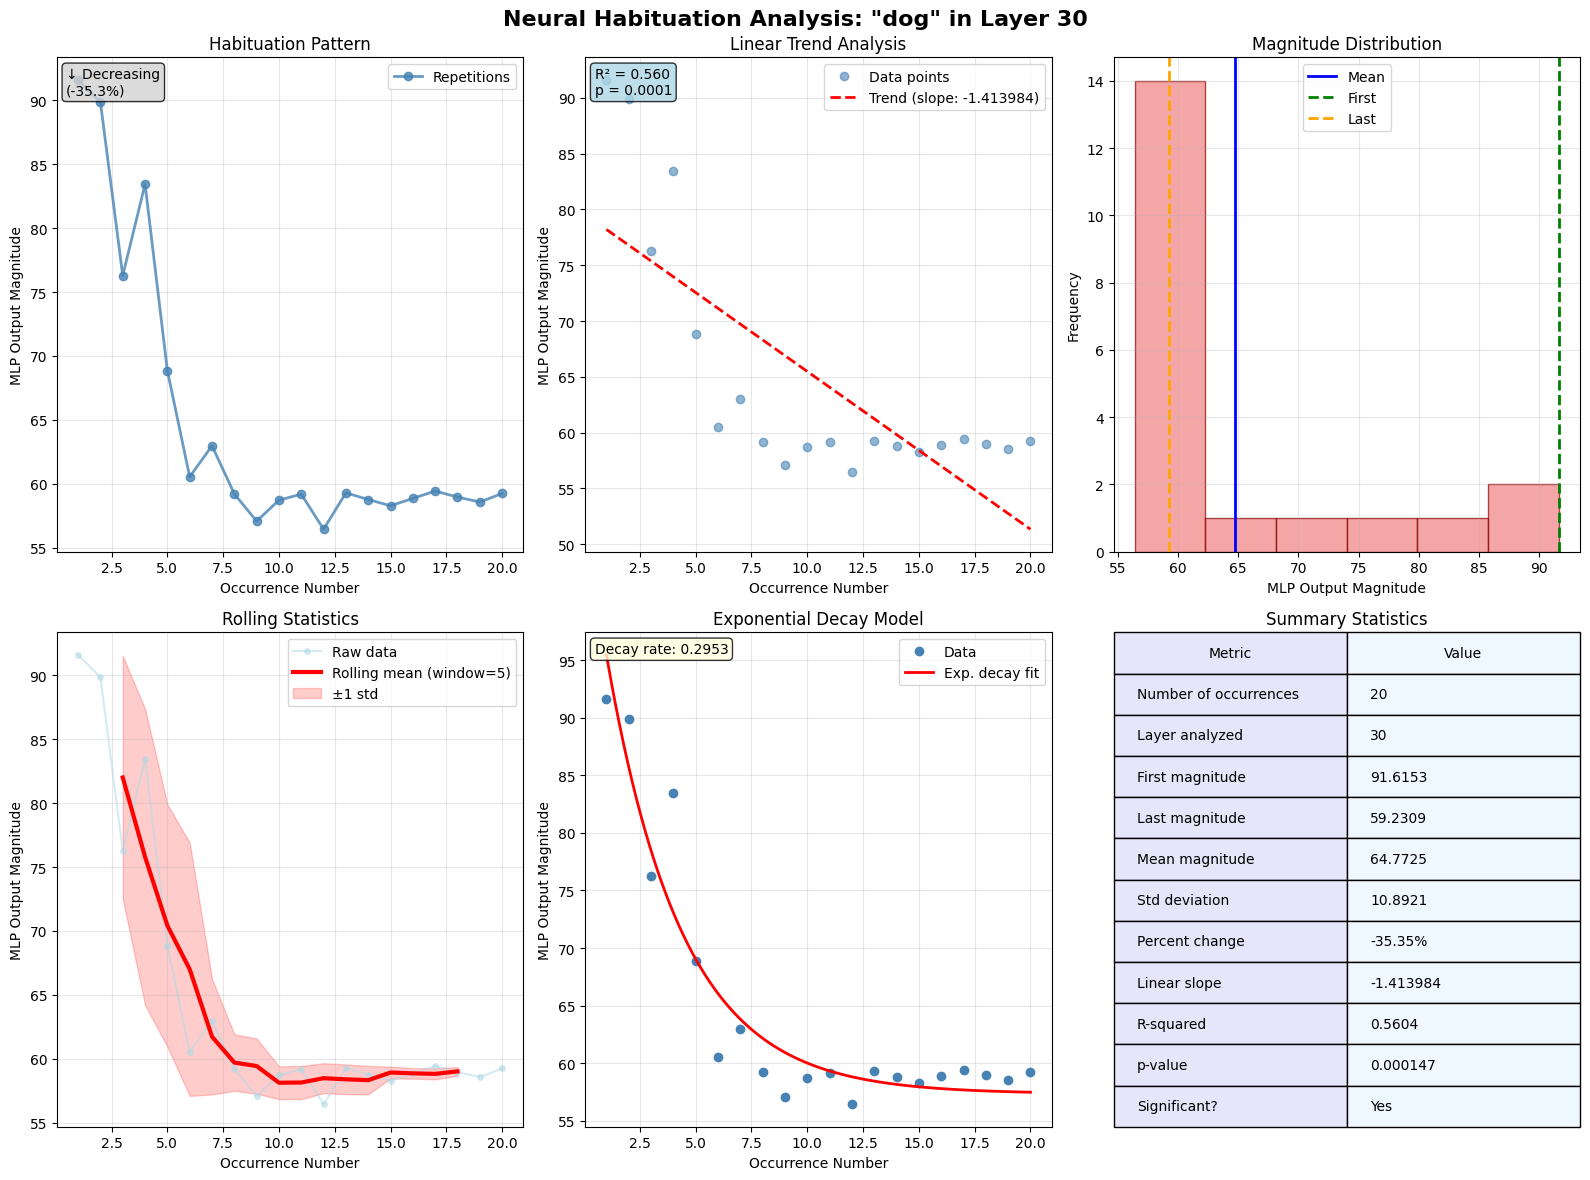

Text: The dog barks every night. That dog is barking nightly. The dog barks every night. Each night the dog barks. The dog barks every night. Nightly barking from the dog. The dog barks every night. The dog's nightly barking occurs. The dog barks every night. Every night brings dog barks. The dog barks every night. Dog barking happens each night. The dog barks every night. The nightly dog barking continues. The dog barks every night. Each evening the dog barks. The dog barks every night. The dog produces nightly barks. The dog barks every night. Nighttime brings the dog's barks. The dog barks every night. The dog vocalizes each night. The dog barks every night. Every night features dog barks.
Registering hooks for token positions: [1, 8, 15, 24, 29, 41, 44, 51, 59, 68, 73, 79, 87, 95, 101, 110, 115, 122, 129, 139, 145, 152, 159, 168]
Registered 36 MLP hooks
Running inference on 172 tokens...
Captured activations for 864 position-layer combinations
Target token: 'dog'
Layer analyzed: 30

/home/danielaush/Documents/do-transformers-habituate/utils/visualization.py:149: OptimizeWarning: Covariance of the parameters could not be estimated
  popt, pcov = curve_fit(exp_decay, x_data, y_data,


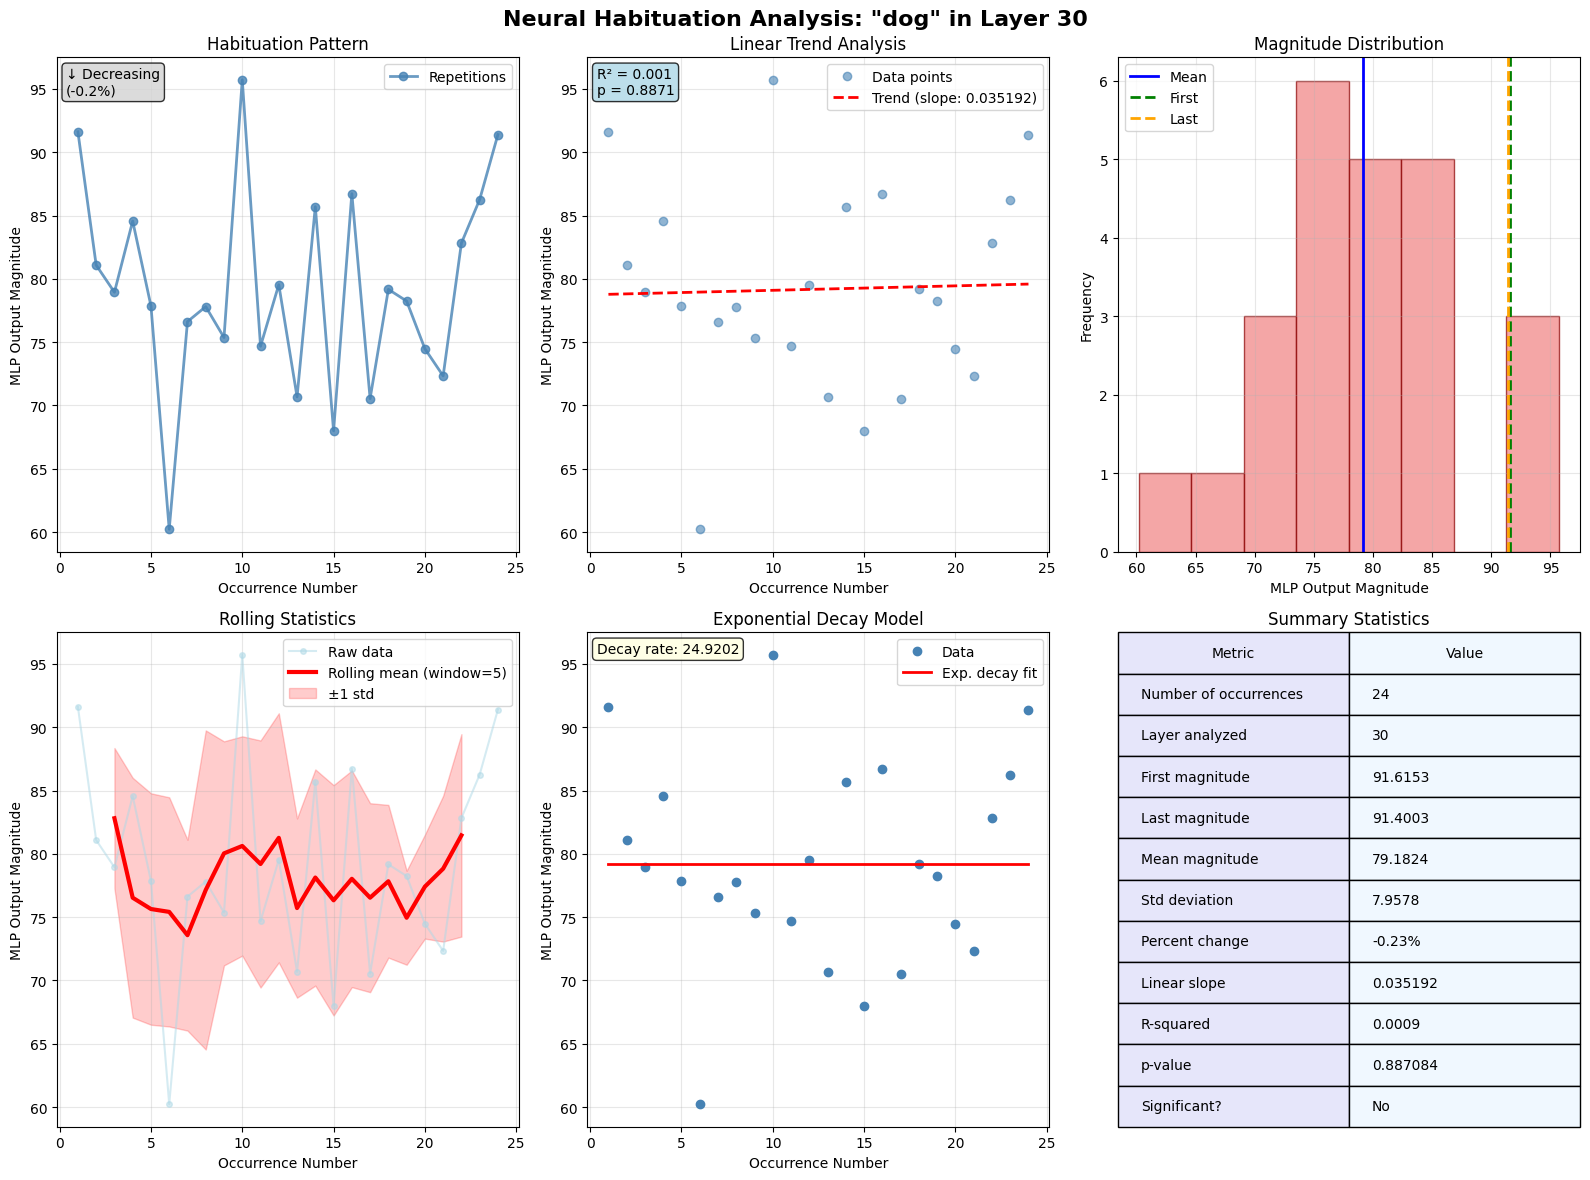

In [ ]:
# Experiment setup
# CONDITION 1: Pure Repetition (Baseline)
# Maximum redundancy - should show strongest habituation if it exists
pure_repetition = "The dog barks every night. " * 20

# CONDITION 2: Spaced Repetition with Neutral Context
# Same sentence, but spaced with neutral filler - tests if spacing affects habituation
spaced_neutral = """The dog barks every night. The sun rises in the east. Water flows down the hill. The dog barks every night. Books contain written words. Trees have green leaves. The dog barks every night. Cars drive on roads. Birds fly in the sky. The dog barks every night. Houses have front doors. Clocks show the time. The dog barks every night. Flowers bloom in spring. Rain falls from clouds. The dog barks every night. Stars shine at night. Fish swim in water. The dog barks every night. Trains run on tracks. Wind moves the air. The dog barks every night. Bread is made from wheat. Ice melts when heated. The dog barks every night. Grass grows in fields. Lights illuminate darkness. The dog barks every night. Boats float on water. Snow falls in winter. The dog barks every night. Chairs provide seating space. Bridges span across rivers. The dog barks every night. Fire produces heat. Mountains reach great heights. The dog barks every night. Keys unlock doors. Mirrors reflect images. The dog barks every night."""

# CONDITION 3: Dense Repetition with Minimal Context
# Tests habituation with minimal interference but some context breaks
dense_minimal = """The dog barks every night. The dog barks every night. The dog barks every night. Brief pause. The dog barks every night. The dog barks every night. The dog barks every night. Brief pause. The dog barks every night. The dog barks every night. The dog barks every night. Brief pause. The dog barks every night. The dog barks every night. The dog barks every night. Brief pause. The dog barks every night. The dog barks every night. The dog barks every night. Brief pause. The dog barks every night. The dog barks every night. The dog barks every night. Brief pause. The dog barks every night. The dog barks every night."""

# CONDITION 4: Semantic Constancy with Syntactic Variation
# Same meaning, different forms - tests if semantic vs syntactic repetition matters
semantic_variation = """The dog barks every night. That dog is barking nightly. The dog barks every night. Each night the dog barks. The dog barks every night. Nightly barking from the dog. The dog barks every night. The dog's nightly barking occurs. The dog barks every night. Every night brings dog barks. The dog barks every night. Dog barking happens each night. The dog barks every night. The nightly dog barking continues. The dog barks every night. Each evening the dog barks. The dog barks every night. The dog produces nightly barks. The dog barks every night. Nighttime brings the dog's barks. The dog barks every night. The dog vocalizes each night. The dog barks every night. Every night features dog barks."""

layer_to_analyze = 30 # 35 is best_layer, please see plot in the next sections


_ = get_statistics(recorder, pure_repetition, target_token, layer_to_analyze)

_ = get_statistics(recorder, spaced_neutral, target_token, layer_to_analyze)

_ = get_statistics(recorder, dense_minimal, target_token, layer_to_analyze)

_ = get_statistics(recorder, semantic_variation, target_token, layer_to_analyze)

Text: The dog barks every night. The dog barks every night. The dog barks every night. The dog barks every night. The dog barks every night. The dog barks every night. The dog barks every night. The dog barks every night. The dog barks every night. The dog barks every night. The dog barks every night. The dog barks every night. The dog barks every night. The dog barks every night. The dog barks every night. The dog barks every night. The dog barks every night. The dog barks every night. The dog barks every night. The dog barks every night. 
Registering hooks for token positions: [1, 8, 15, 22, 29, 36, 43, 50, 57, 64, 71, 78, 85, 92, 99, 106, 113, 120, 127, 134]
Registered 36 MLP hooks
Running inference on 141 tokens...
Captured activations for 720 position-layer combinations
Target token: 'dog'
Layer analyzed: 35
Number of occurrences: 20
First magnitude: 234.9348
Last magnitude: 339.8594
Mean ± Std: 326.9858 ± 24.3527
Change: 44.66%

Linear Trend Analysis:
Slope: 2.688275 ± 0.767731
R

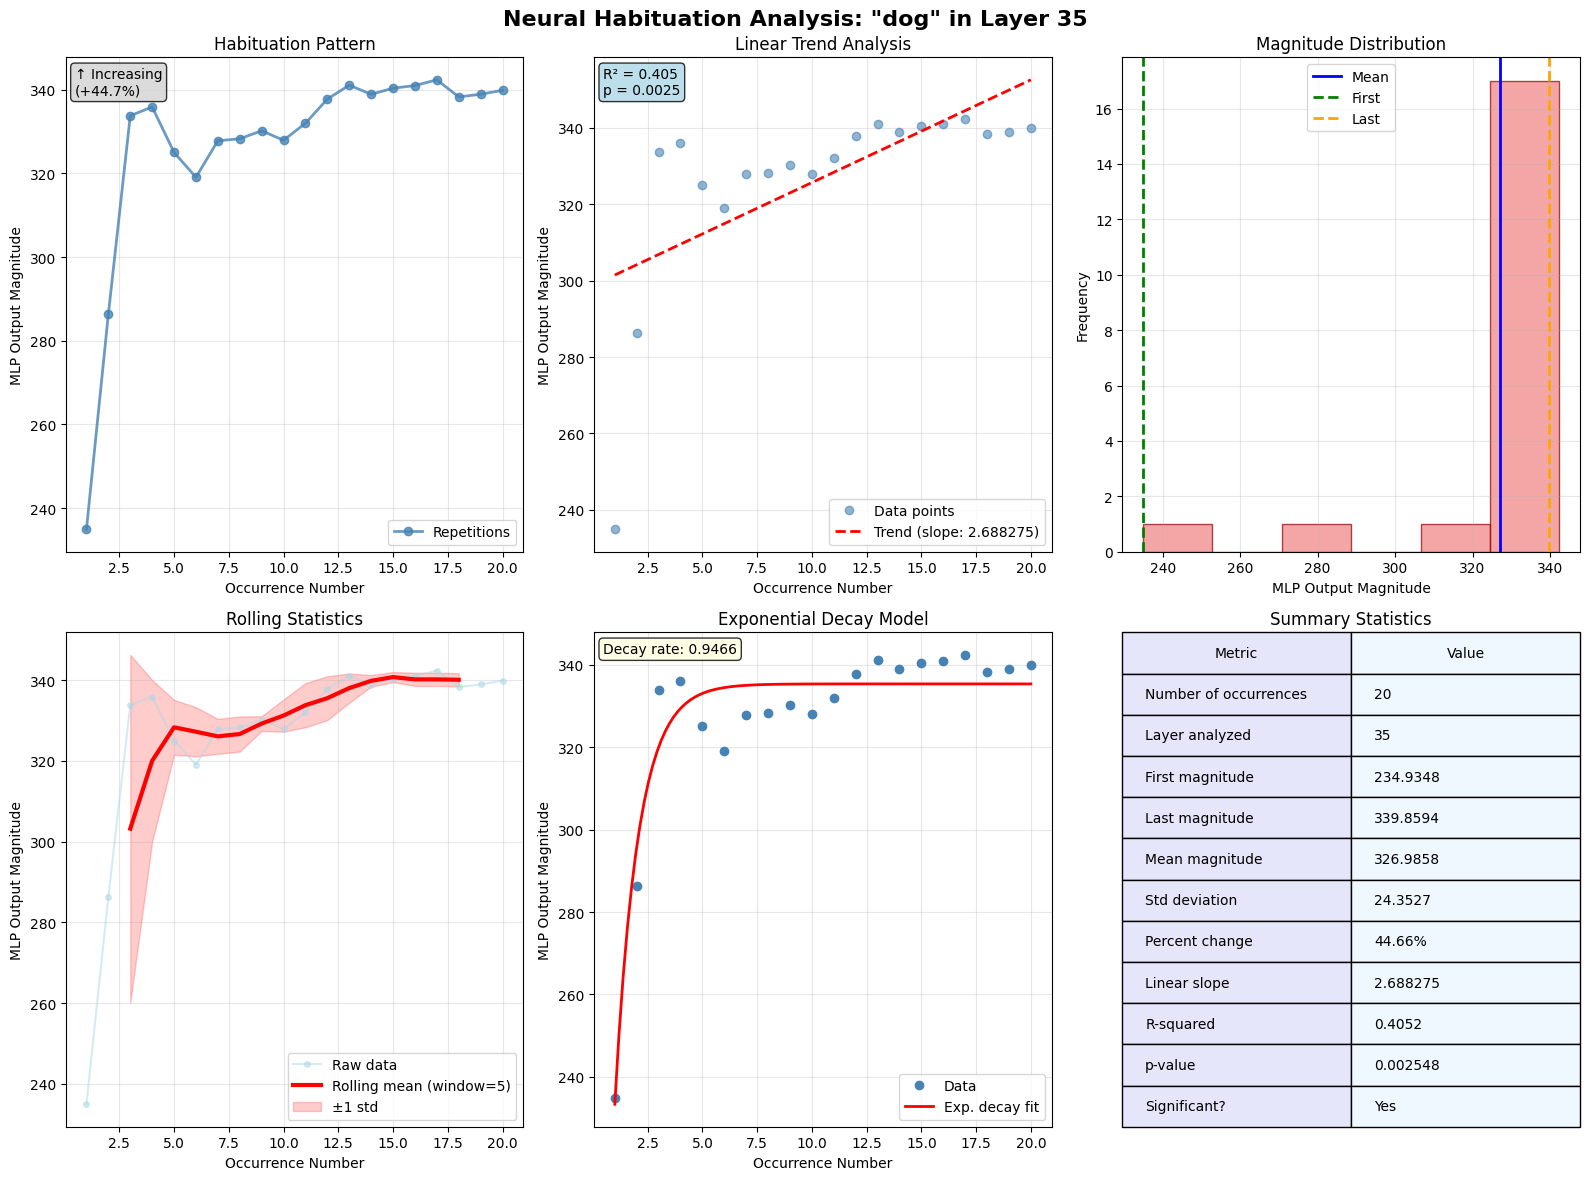

Text: The dog barks every night. The sun rises in the east. Water flows down the hill. The dog barks every night. Books contain written words. Trees have green leaves. The dog barks every night. Cars drive on roads. Birds fly in the sky. The dog barks every night. Houses have front doors. Clocks show the time. The dog barks every night. Flowers bloom in spring. Rain falls from clouds. The dog barks every night. Stars shine at night. Fish swim in water. The dog barks every night. Trains run on tracks. Wind moves the air. The dog barks every night. Bread is made from wheat. Ice melts when heated. The dog barks every night. Grass grows in fields. Lights illuminate darkness. The dog barks every night. Boats float on water. Snow falls in winter. The dog barks every night. Chairs provide seating space. Bridges span across rivers. The dog barks every night. Fire produces heat. Mountains reach great heights. The dog barks every night. Keys unlock doors. Mirrors reflect images. The dog barks ev

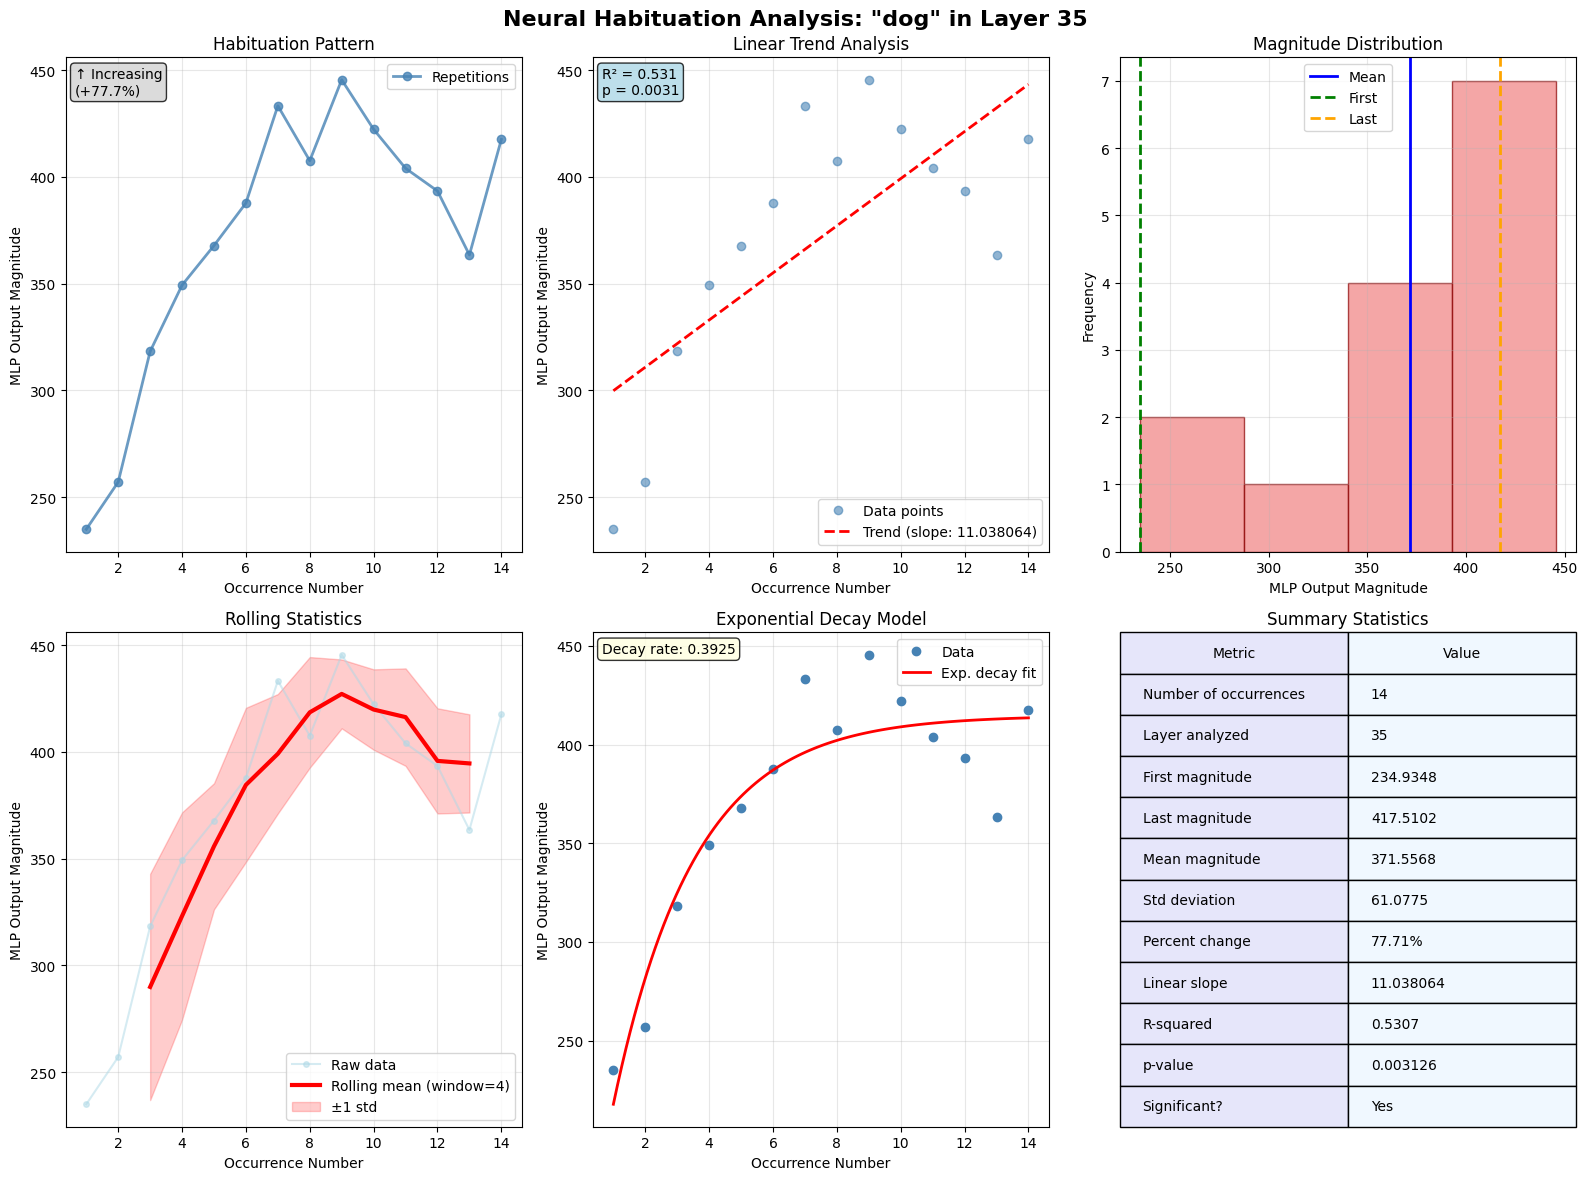

Text: The dog barks every night. The dog barks every night. The dog barks every night. Brief pause. The dog barks every night. The dog barks every night. The dog barks every night. Brief pause. The dog barks every night. The dog barks every night. The dog barks every night. Brief pause. The dog barks every night. The dog barks every night. The dog barks every night. Brief pause. The dog barks every night. The dog barks every night. The dog barks every night. Brief pause. The dog barks every night. The dog barks every night. The dog barks every night. Brief pause. The dog barks every night. The dog barks every night.
Registering hooks for token positions: [1, 8, 15, 25, 32, 39, 49, 56, 63, 73, 80, 87, 97, 104, 111, 121, 128, 135, 145, 152]
Registered 36 MLP hooks
Running inference on 158 tokens...
Captured activations for 720 position-layer combinations
Target token: 'dog'
Layer analyzed: 35
Number of occurrences: 20
First magnitude: 234.9348
Last magnitude: 347.6604
Mean ± Std: 326.658

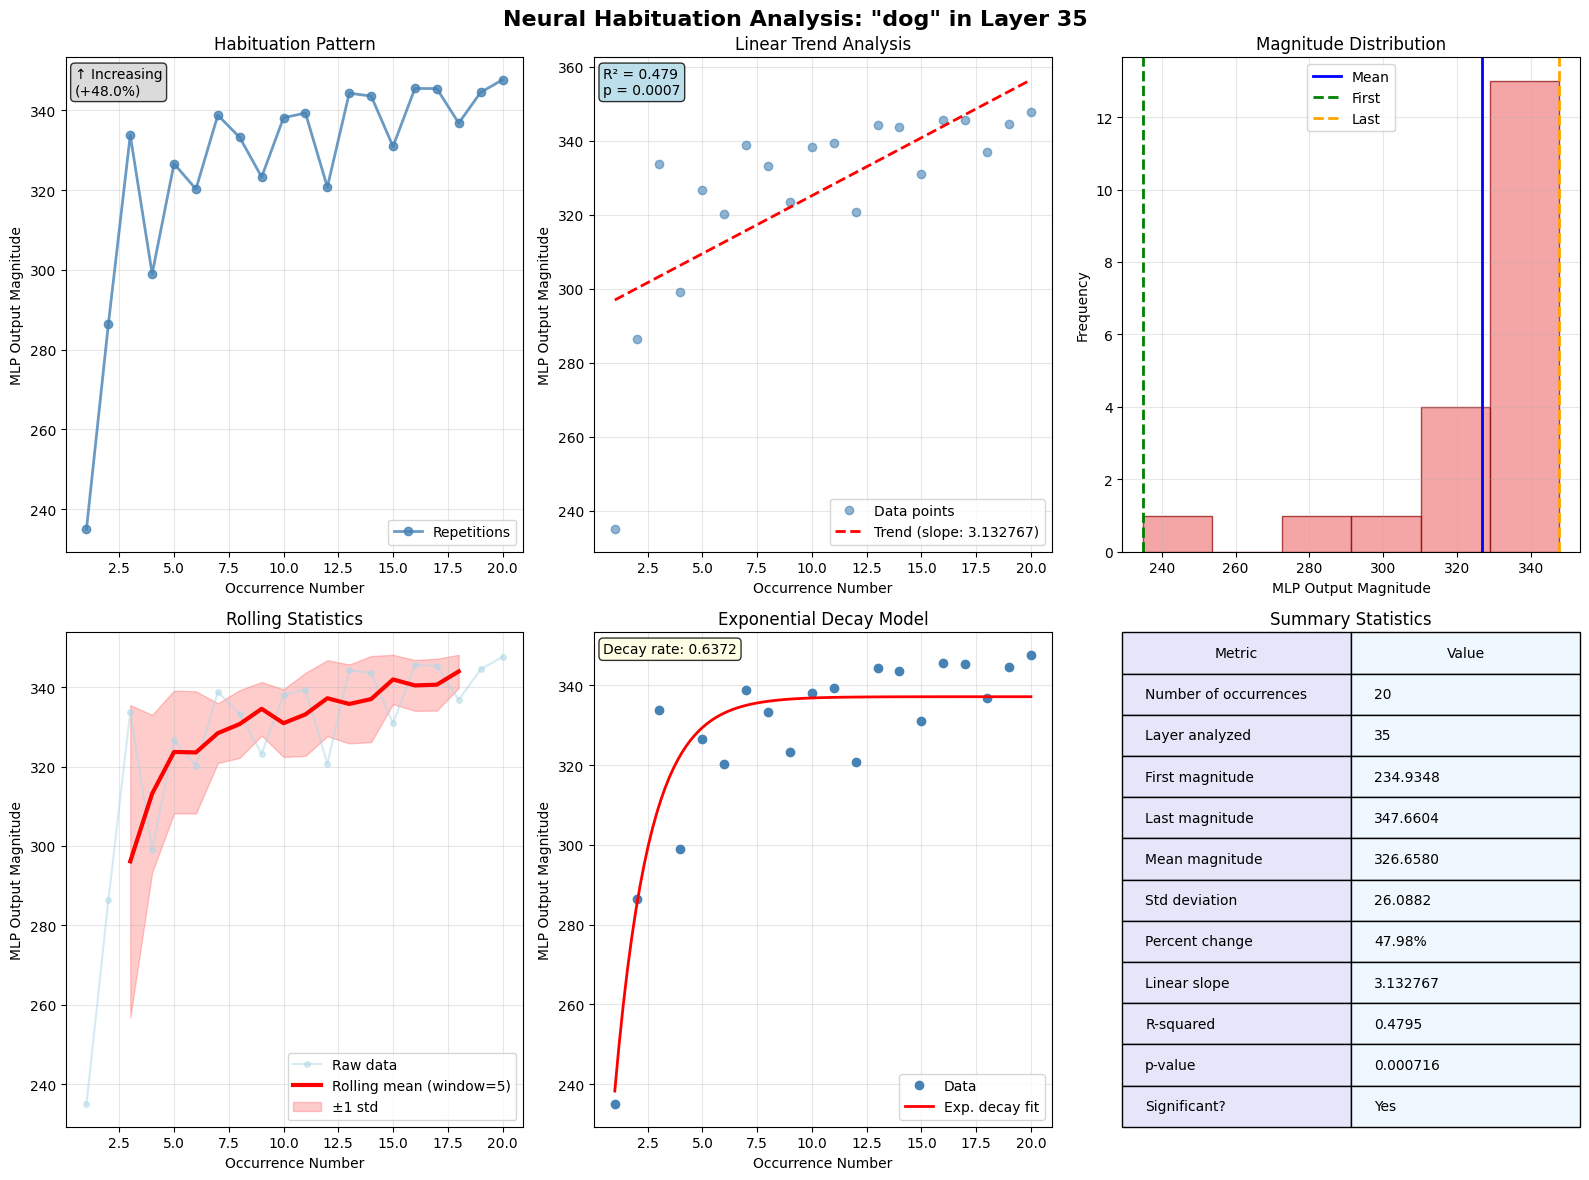

Text: The dog barks every night. That dog is barking nightly. The dog barks every night. Each night the dog barks. The dog barks every night. Nightly barking from the dog. The dog barks every night. The dog's nightly barking occurs. The dog barks every night. Every night brings dog barks. The dog barks every night. Dog barking happens each night. The dog barks every night. The nightly dog barking continues. The dog barks every night. Each evening the dog barks. The dog barks every night. The dog produces nightly barks. The dog barks every night. Nighttime brings the dog's barks. The dog barks every night. The dog vocalizes each night. The dog barks every night. Every night features dog barks.
Registering hooks for token positions: [1, 8, 15, 24, 29, 41, 44, 51, 59, 68, 73, 79, 87, 95, 101, 110, 115, 122, 129, 139, 145, 152, 159, 168]
Registered 36 MLP hooks
Running inference on 172 tokens...
Captured activations for 864 position-layer combinations
Target token: 'dog'
Layer analyzed: 35

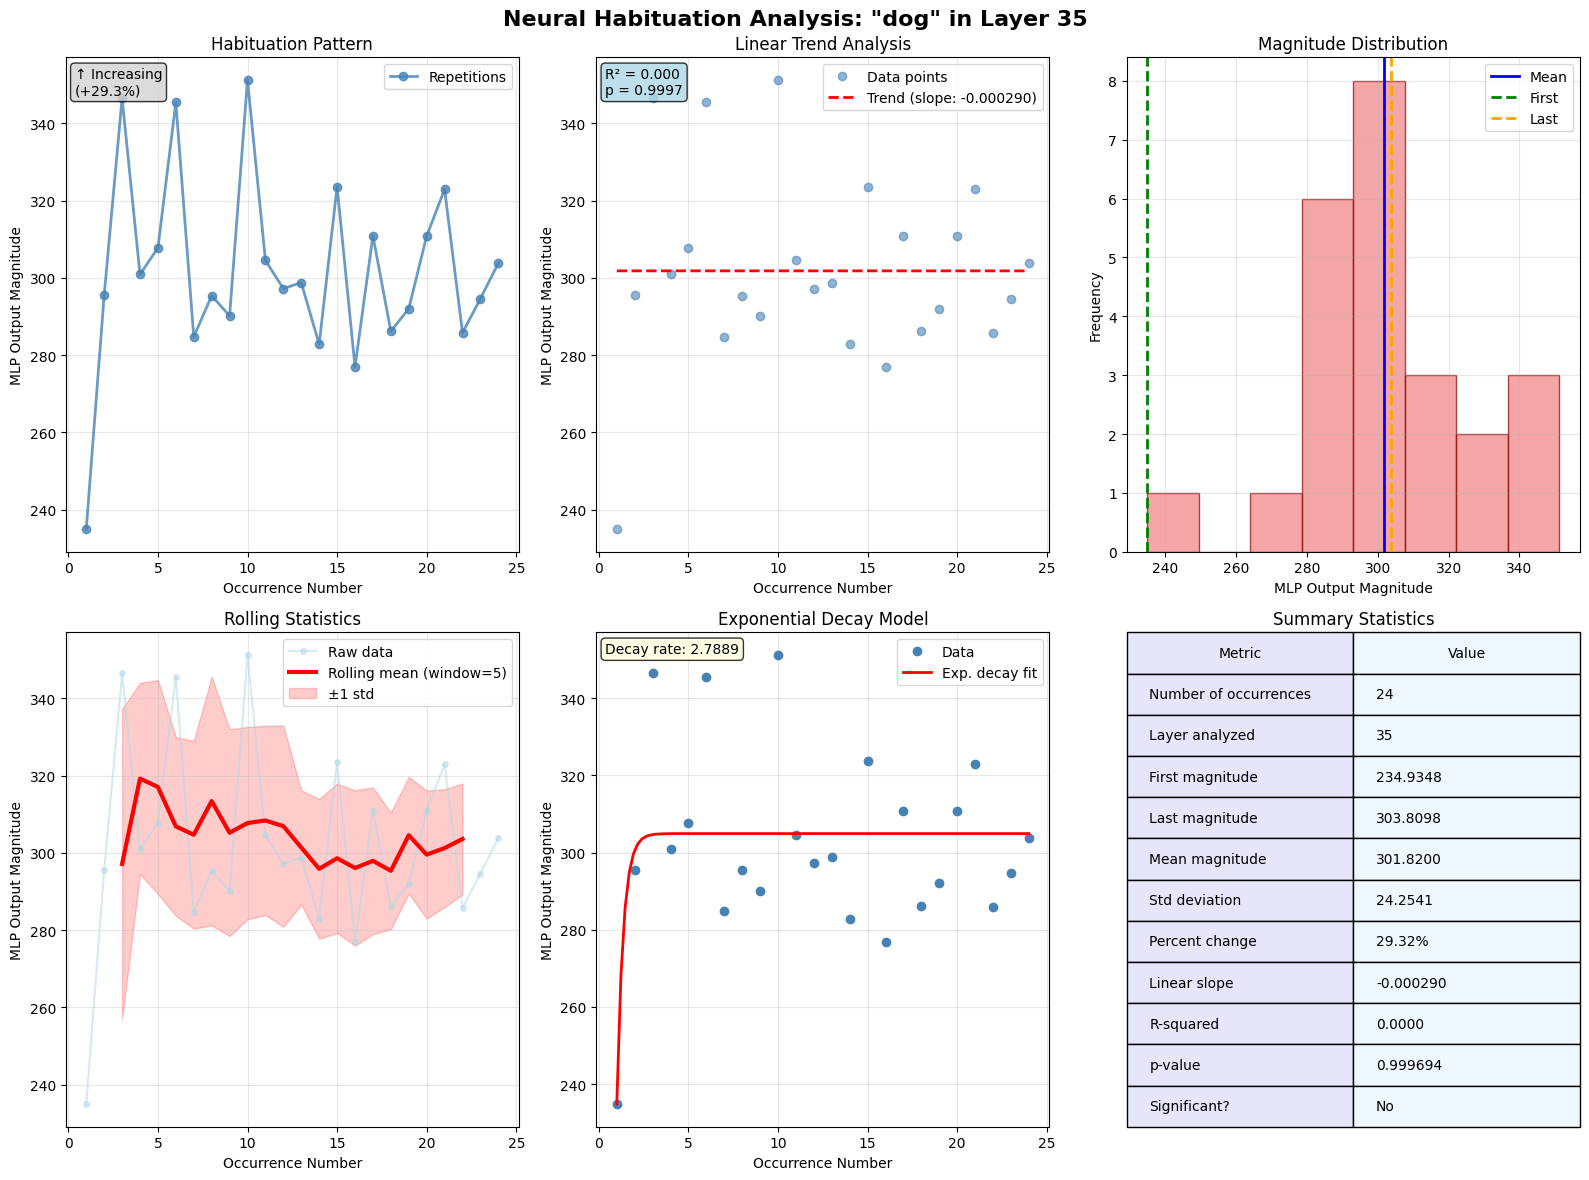

In [7]:
# Experiment setup
# CONDITION 1: Pure Repetition (Baseline)
# Maximum redundancy - should show strongest habituation if it exists
pure_repetition = "The dog barks every night. " * 20

# CONDITION 2: Spaced Repetition with Neutral Context
# Same sentence, but spaced with neutral filler - tests if spacing affects habituation
spaced_neutral = """The dog barks every night. The sun rises in the east. Water flows down the hill. The dog barks every night. Books contain written words. Trees have green leaves. The dog barks every night. Cars drive on roads. Birds fly in the sky. The dog barks every night. Houses have front doors. Clocks show the time. The dog barks every night. Flowers bloom in spring. Rain falls from clouds. The dog barks every night. Stars shine at night. Fish swim in water. The dog barks every night. Trains run on tracks. Wind moves the air. The dog barks every night. Bread is made from wheat. Ice melts when heated. The dog barks every night. Grass grows in fields. Lights illuminate darkness. The dog barks every night. Boats float on water. Snow falls in winter. The dog barks every night. Chairs provide seating space. Bridges span across rivers. The dog barks every night. Fire produces heat. Mountains reach great heights. The dog barks every night. Keys unlock doors. Mirrors reflect images. The dog barks every night."""

# CONDITION 3: Dense Repetition with Minimal Context
# Tests habituation with minimal interference but some context breaks
dense_minimal = """The dog barks every night. The dog barks every night. The dog barks every night. Brief pause. The dog barks every night. The dog barks every night. The dog barks every night. Brief pause. The dog barks every night. The dog barks every night. The dog barks every night. Brief pause. The dog barks every night. The dog barks every night. The dog barks every night. Brief pause. The dog barks every night. The dog barks every night. The dog barks every night. Brief pause. The dog barks every night. The dog barks every night. The dog barks every night. Brief pause. The dog barks every night. The dog barks every night."""

# CONDITION 4: Semantic Constancy with Syntactic Variation
# Same meaning, different forms - tests if semantic vs syntactic repetition matters
semantic_variation = """The dog barks every night. That dog is barking nightly. The dog barks every night. Each night the dog barks. The dog barks every night. Nightly barking from the dog. The dog barks every night. The dog's nightly barking occurs. The dog barks every night. Every night brings dog barks. The dog barks every night. Dog barking happens each night. The dog barks every night. The nightly dog barking continues. The dog barks every night. Each evening the dog barks. The dog barks every night. The dog produces nightly barks. The dog barks every night. Nighttime brings the dog's barks. The dog barks every night. The dog vocalizes each night. The dog barks every night. Every night features dog barks."""

layer_to_analyze = 35 # 35 is best_layer, please see plot in the next sections


_ = get_statistics(recorder, pure_repetition, target_token, layer_to_analyze)

_ = get_statistics(recorder, spaced_neutral, target_token, layer_to_analyze)

_ = get_statistics(recorder, dense_minimal, target_token, layer_to_analyze)

_ = get_statistics(recorder, semantic_variation, target_token, layer_to_analyze)

Text: The dog barks every night. The dog barks every night. The dog barks every night. The dog barks every night. The dog barks every night. The dog barks every night. The dog barks every night. The dog barks every night. The dog barks every night. The dog barks every night. The dog barks every night. The dog barks every night. The dog barks every night. The dog barks every night. The dog barks every night. The dog barks every night. The dog barks every night. The dog barks every night. The dog barks every night. The dog barks every night. 
Registering hooks for token positions: [1, 8, 15, 22, 29, 36, 43, 50, 57, 64, 71, 78, 85, 92, 99, 106, 113, 120, 127, 134]
Registered 36 MLP hooks
Running inference on 141 tokens...
Captured activations for 720 position-layer combinations
Target token: 'dog'
Layer analyzed: 10
Number of occurrences: 20
First magnitude: 18.6992
Last magnitude: 10.7303
Mean ± Std: 12.6707 ± 2.7271
Change: -42.62%

Linear Trend Analysis:
Slope: -0.381849 ± 0.065767
R²:

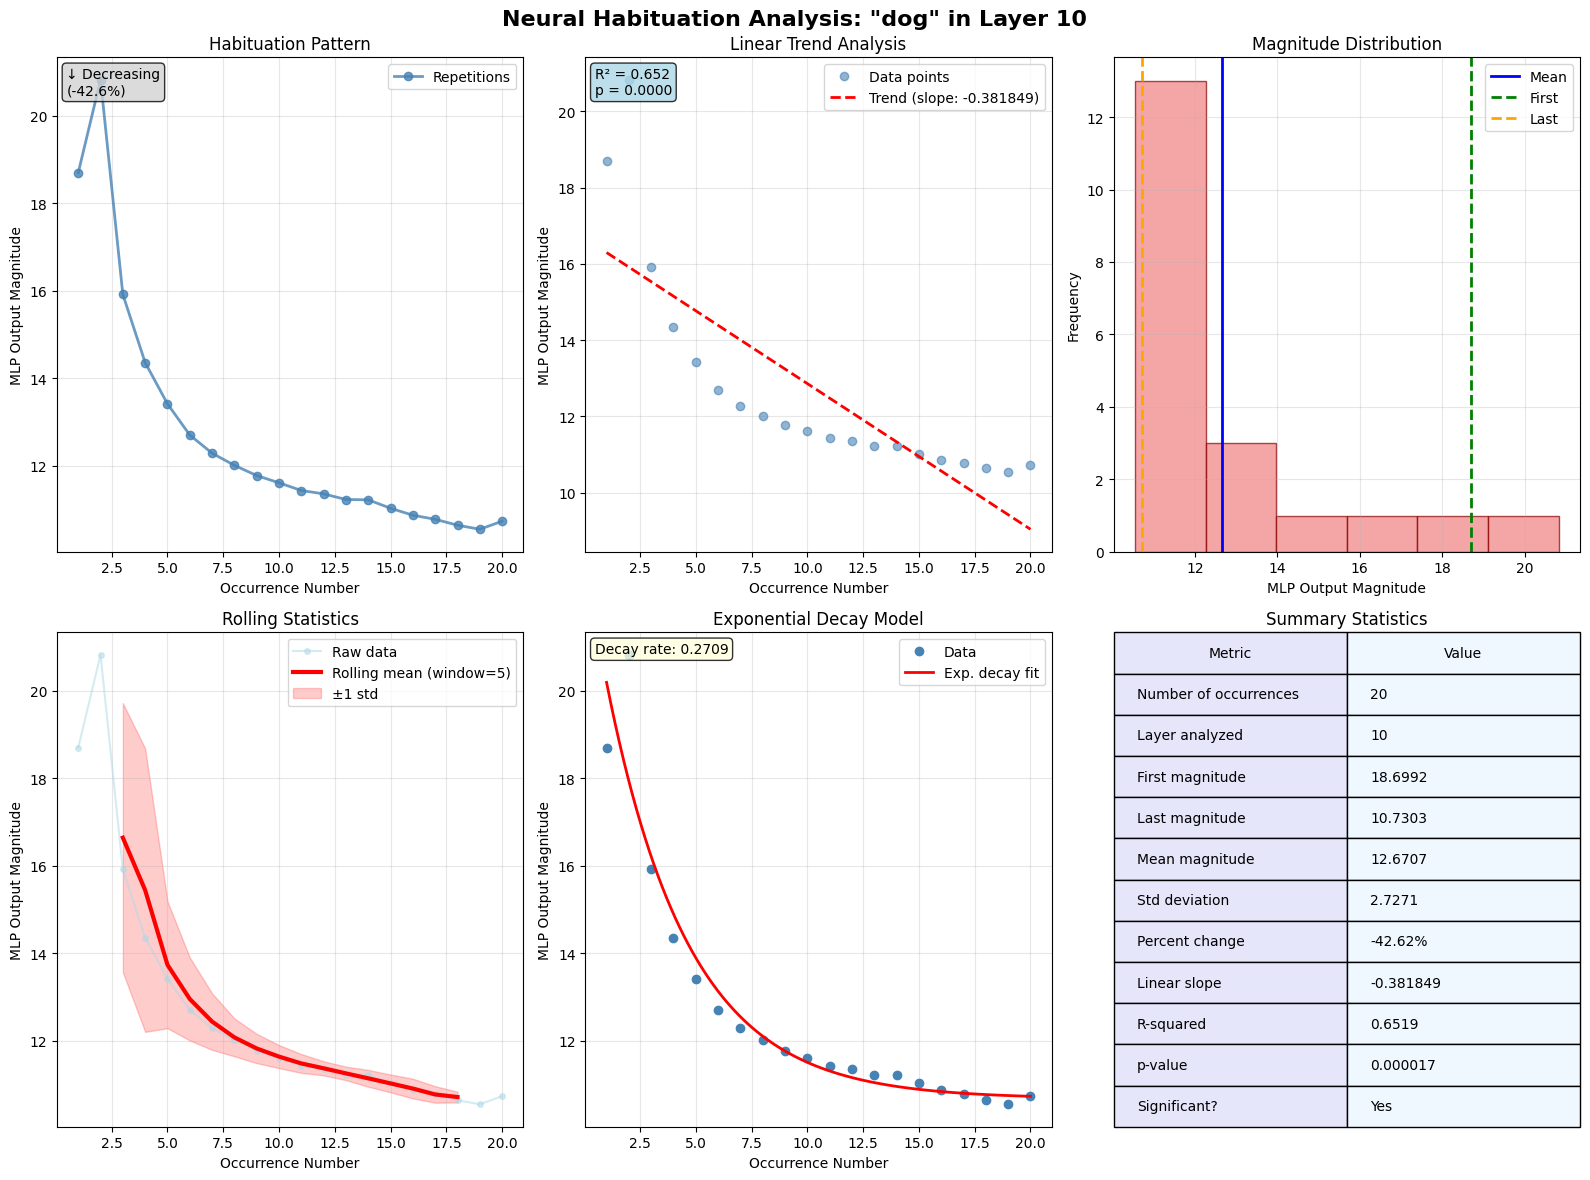

Text: The dog barks every night. The sun rises in the east. Water flows down the hill. The dog barks every night. Books contain written words. Trees have green leaves. The dog barks every night. Cars drive on roads. Birds fly in the sky. The dog barks every night. Houses have front doors. Clocks show the time. The dog barks every night. Flowers bloom in spring. Rain falls from clouds. The dog barks every night. Stars shine at night. Fish swim in water. The dog barks every night. Trains run on tracks. Wind moves the air. The dog barks every night. Bread is made from wheat. Ice melts when heated. The dog barks every night. Grass grows in fields. Lights illuminate darkness. The dog barks every night. Boats float on water. Snow falls in winter. The dog barks every night. Chairs provide seating space. Bridges span across rivers. The dog barks every night. Fire produces heat. Mountains reach great heights. The dog barks every night. Keys unlock doors. Mirrors reflect images. The dog barks ev

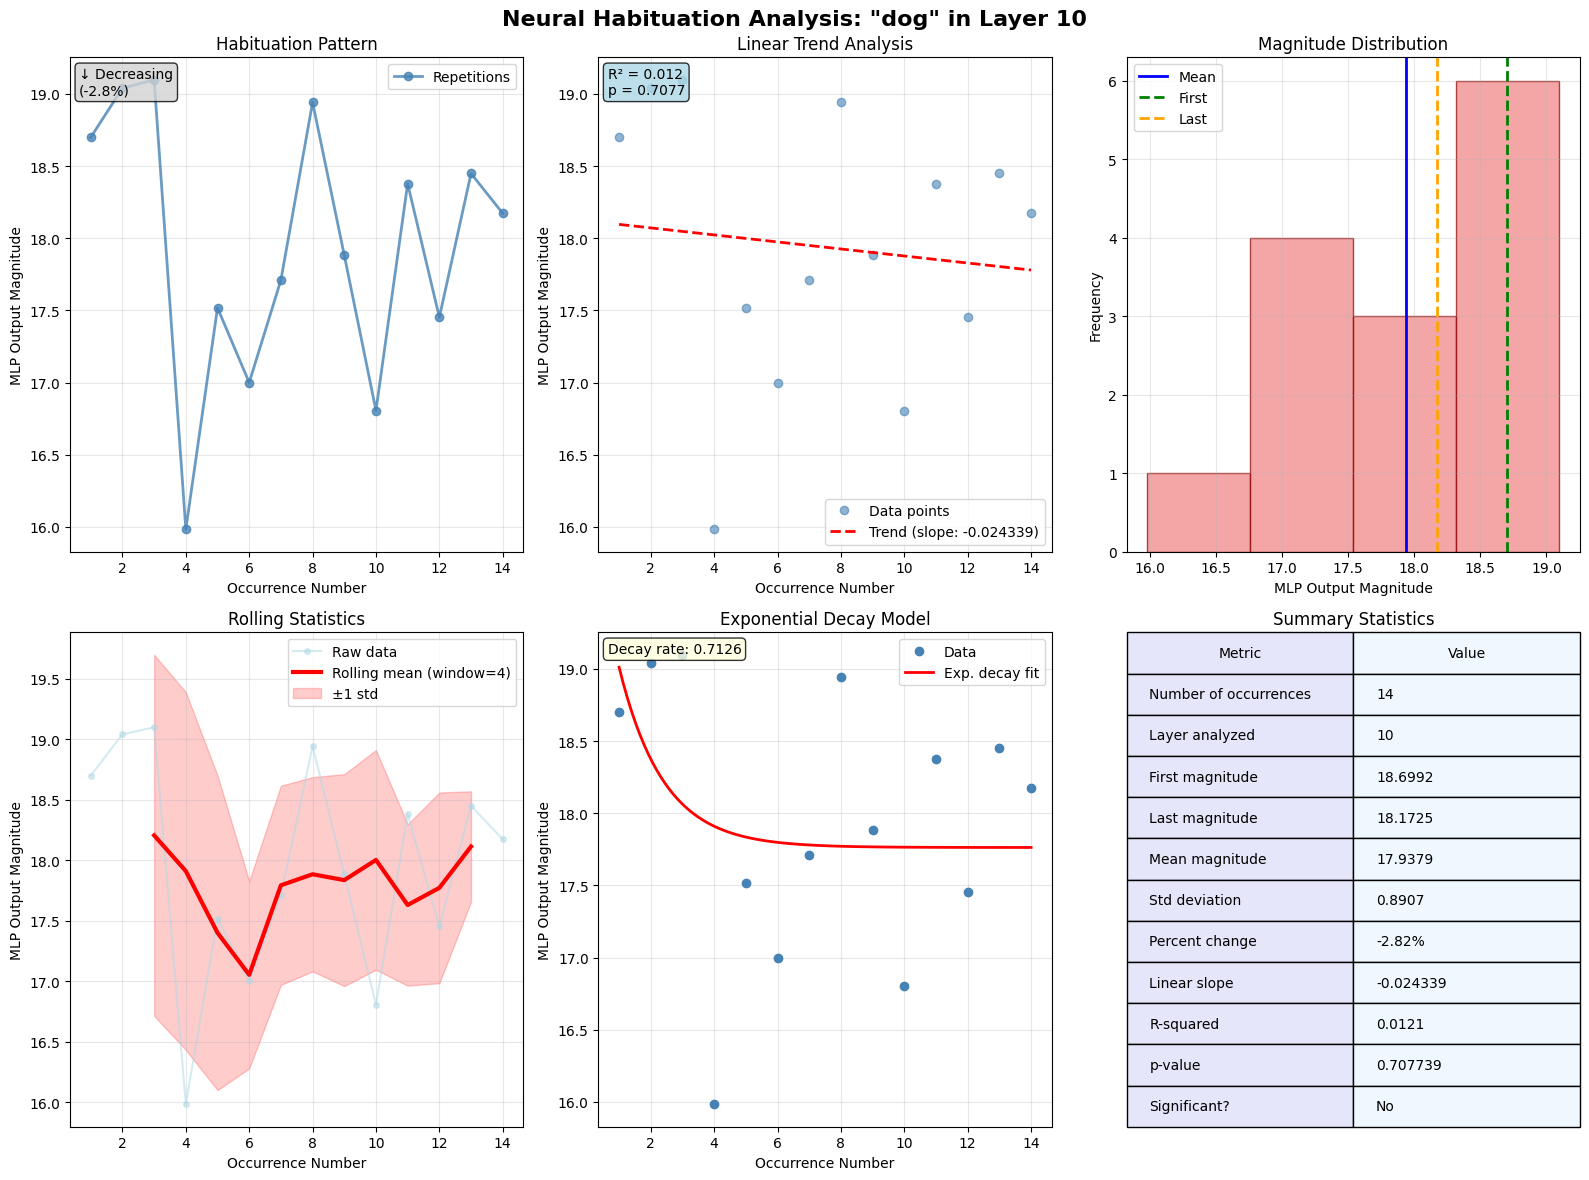

Text: The dog barks every night. The dog barks every night. The dog barks every night. Brief pause. The dog barks every night. The dog barks every night. The dog barks every night. Brief pause. The dog barks every night. The dog barks every night. The dog barks every night. Brief pause. The dog barks every night. The dog barks every night. The dog barks every night. Brief pause. The dog barks every night. The dog barks every night. The dog barks every night. Brief pause. The dog barks every night. The dog barks every night. The dog barks every night. Brief pause. The dog barks every night. The dog barks every night.
Registering hooks for token positions: [1, 8, 15, 25, 32, 39, 49, 56, 63, 73, 80, 87, 97, 104, 111, 121, 128, 135, 145, 152]
Registered 36 MLP hooks
Running inference on 158 tokens...
Captured activations for 720 position-layer combinations
Target token: 'dog'
Layer analyzed: 10
Number of occurrences: 20
First magnitude: 18.6992
Last magnitude: 10.4582
Mean ± Std: 12.7575 ±

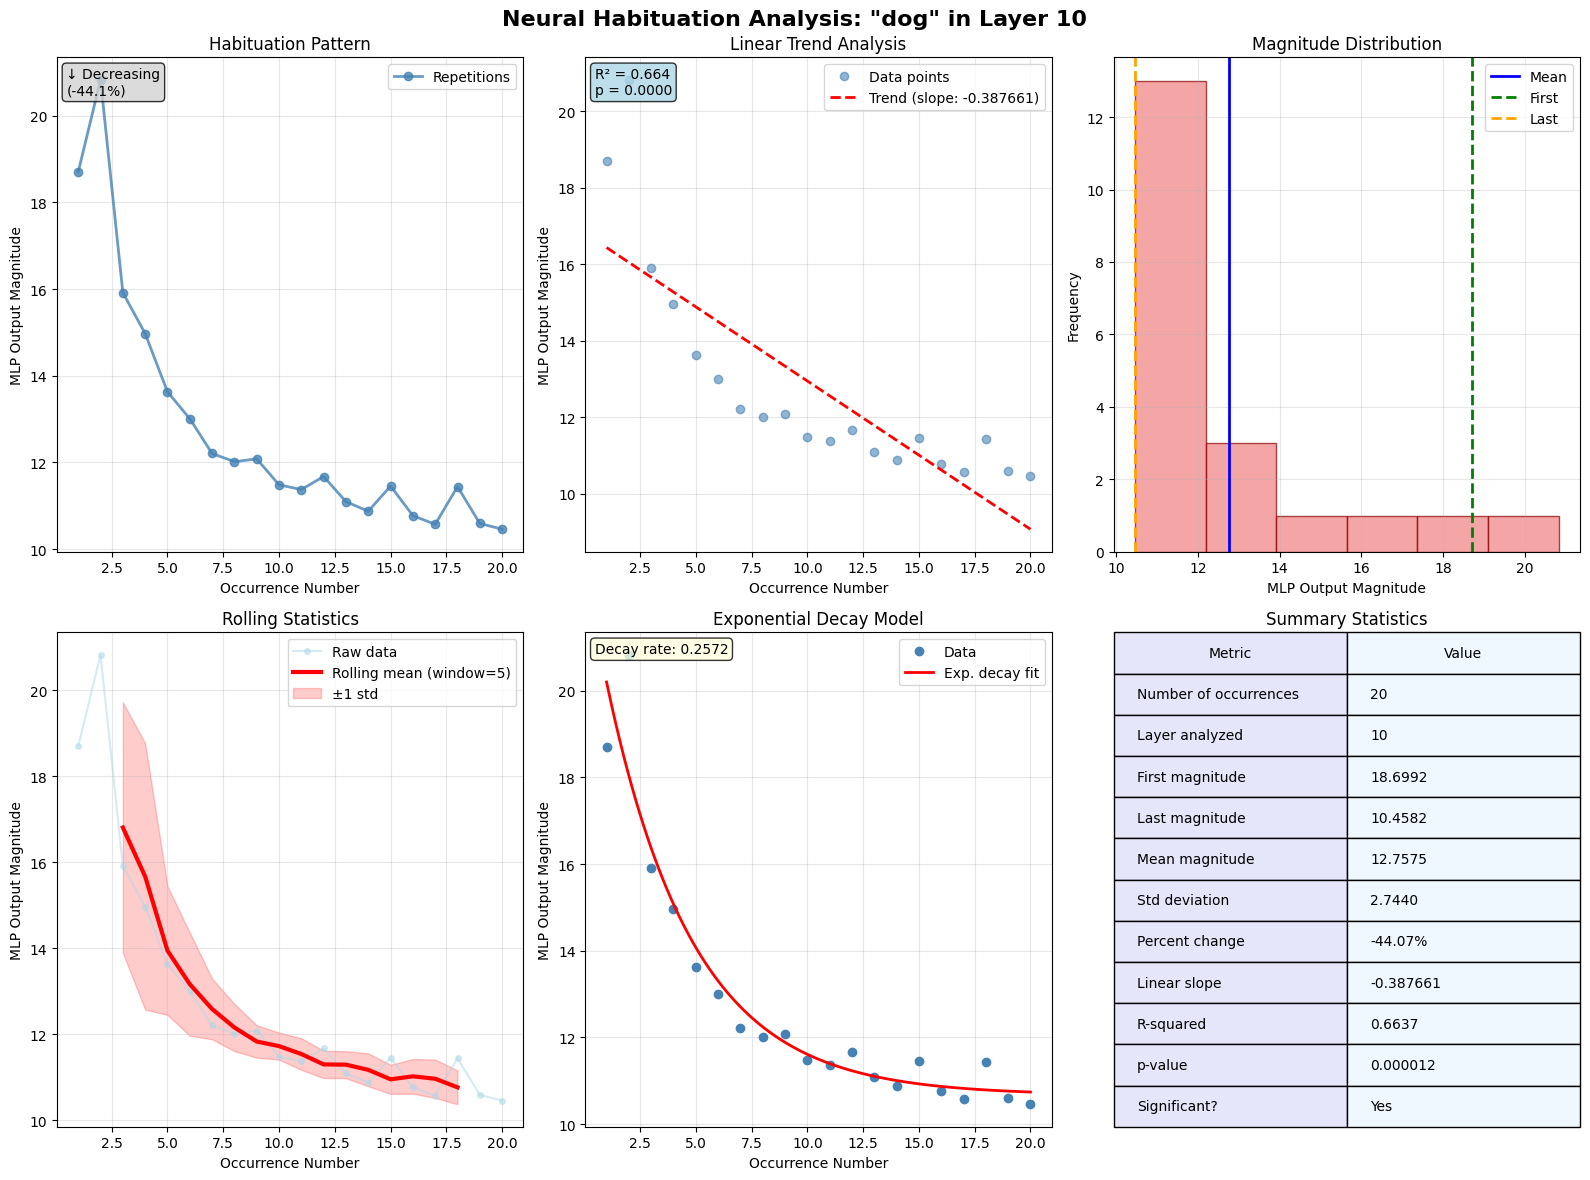

Text: The dog barks every night. That dog is barking nightly. The dog barks every night. Each night the dog barks. The dog barks every night. Nightly barking from the dog. The dog barks every night. The dog's nightly barking occurs. The dog barks every night. Every night brings dog barks. The dog barks every night. Dog barking happens each night. The dog barks every night. The nightly dog barking continues. The dog barks every night. Each evening the dog barks. The dog barks every night. The dog produces nightly barks. The dog barks every night. Nighttime brings the dog's barks. The dog barks every night. The dog vocalizes each night. The dog barks every night. Every night features dog barks.
Registering hooks for token positions: [1, 8, 15, 24, 29, 41, 44, 51, 59, 68, 73, 79, 87, 95, 101, 110, 115, 122, 129, 139, 145, 152, 159, 168]
Registered 36 MLP hooks
Running inference on 172 tokens...
Captured activations for 864 position-layer combinations
Target token: 'dog'
Layer analyzed: 10

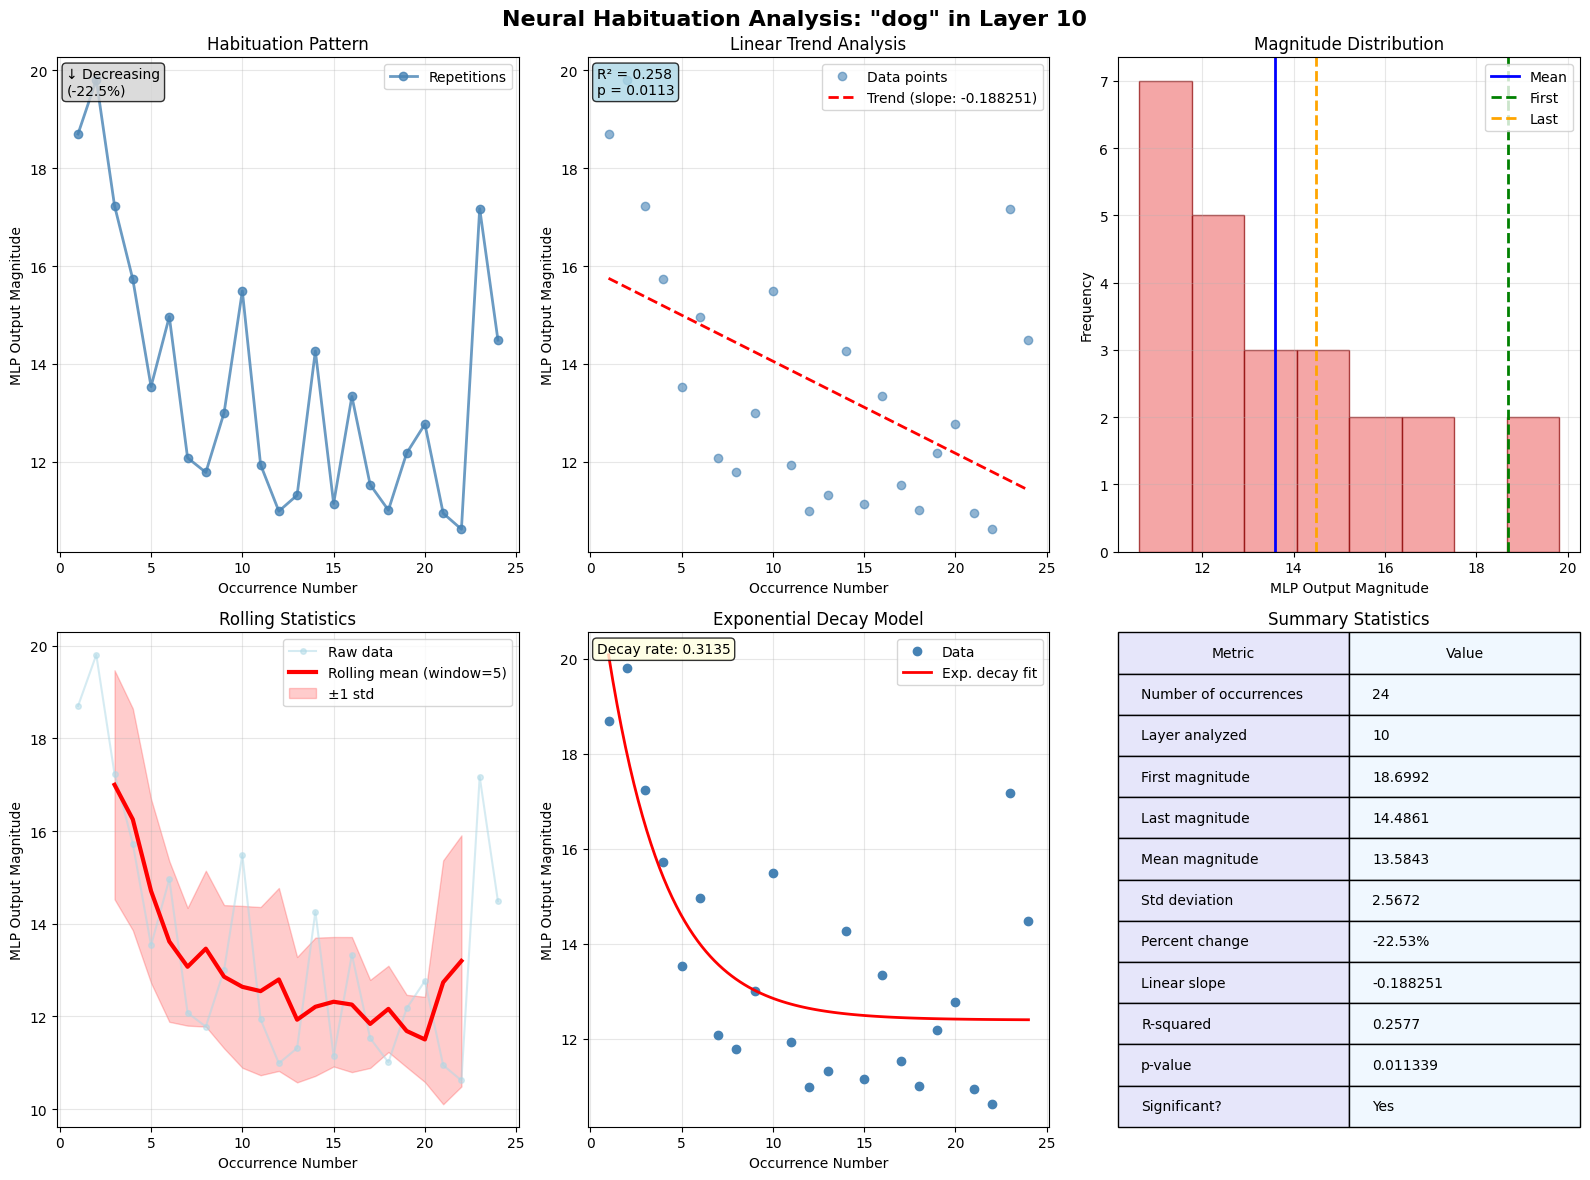

In [8]:
# Experiment setup
# CONDITION 1: Pure Repetition (Baseline)
# Maximum redundancy - should show strongest habituation if it exists
pure_repetition = "The dog barks every night. " * 20

# CONDITION 2: Spaced Repetition with Neutral Context
# Same sentence, but spaced with neutral filler - tests if spacing affects habituation
spaced_neutral = """The dog barks every night. The sun rises in the east. Water flows down the hill. The dog barks every night. Books contain written words. Trees have green leaves. The dog barks every night. Cars drive on roads. Birds fly in the sky. The dog barks every night. Houses have front doors. Clocks show the time. The dog barks every night. Flowers bloom in spring. Rain falls from clouds. The dog barks every night. Stars shine at night. Fish swim in water. The dog barks every night. Trains run on tracks. Wind moves the air. The dog barks every night. Bread is made from wheat. Ice melts when heated. The dog barks every night. Grass grows in fields. Lights illuminate darkness. The dog barks every night. Boats float on water. Snow falls in winter. The dog barks every night. Chairs provide seating space. Bridges span across rivers. The dog barks every night. Fire produces heat. Mountains reach great heights. The dog barks every night. Keys unlock doors. Mirrors reflect images. The dog barks every night."""

# CONDITION 3: Dense Repetition with Minimal Context
# Tests habituation with minimal interference but some context breaks
dense_minimal = """The dog barks every night. The dog barks every night. The dog barks every night. Brief pause. The dog barks every night. The dog barks every night. The dog barks every night. Brief pause. The dog barks every night. The dog barks every night. The dog barks every night. Brief pause. The dog barks every night. The dog barks every night. The dog barks every night. Brief pause. The dog barks every night. The dog barks every night. The dog barks every night. Brief pause. The dog barks every night. The dog barks every night. The dog barks every night. Brief pause. The dog barks every night. The dog barks every night."""

# CONDITION 4: Semantic Constancy with Syntactic Variation
# Same meaning, different forms - tests if semantic vs syntactic repetition matters
semantic_variation = """The dog barks every night. That dog is barking nightly. The dog barks every night. Each night the dog barks. The dog barks every night. Nightly barking from the dog. The dog barks every night. The dog's nightly barking occurs. The dog barks every night. Every night brings dog barks. The dog barks every night. Dog barking happens each night. The dog barks every night. The nightly dog barking continues. The dog barks every night. Each evening the dog barks. The dog barks every night. The dog produces nightly barks. The dog barks every night. Nighttime brings the dog's barks. The dog barks every night. The dog vocalizes each night. The dog barks every night. Every night features dog barks."""

layer_to_analyze = 10 # 35 is best_layer, please see plot in the next sections


_ = get_statistics(recorder, pure_repetition, target_token, layer_to_analyze)

_ = get_statistics(recorder, spaced_neutral, target_token, layer_to_analyze)

_ = get_statistics(recorder, dense_minimal, target_token, layer_to_analyze)

_ = get_statistics(recorder, semantic_variation, target_token, layer_to_analyze)